In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
data = pd.read_csv("data/train.csv")

In [4]:
data = data.dropna()

In [5]:
data.groupby("user_address").anonymous.value_counts()

user_address  anonymous
0x56ab        A120         23
              A112         22
              A117         22
              A118         21
              A128         19
                           ..
0xd47a        M94           1
              M950          1
              M954          1
              M957          1
              M99           1
Name: anonymous, Length: 13936, dtype: int64

In [6]:
df_grouped = data.groupby("user_address").anonymous.value_counts()

<AxesSubplot:>

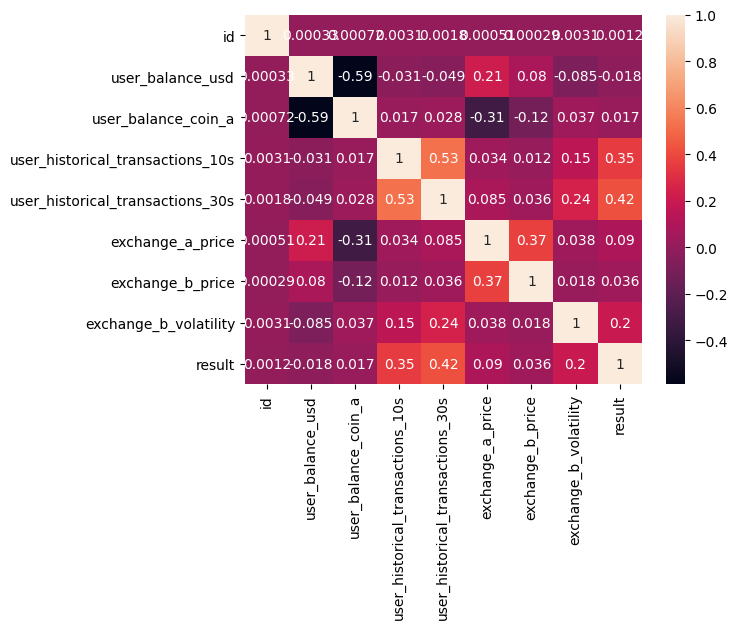

In [7]:
sns.heatmap(data.corr(), annot=True)

In [8]:
data.groupby("exchange_a_volatility").agg({"exchange_b_volatility":["min", "mean", "max"]})

exchange_b_volatility                    
                                        min      mean       max
exchange_a_volatility                                          
high                           4.152780e-07  0.000687  0.005732
low                            0.000000e+00  0.000404  0.009231
medium                         0.000000e+00  0.000619  0.007809
very high                      4.347063e-05  0.000875  0.010446
very low                       0.000000e+00  0.000396  0.004565

In [9]:
data.exchange_b_volatility.describe()

count    289060.000000
mean          0.000459
std           0.000334
min           0.000000
25%           0.000248
50%           0.000375
75%           0.000570
max           0.010446
Name: exchange_b_volatility, dtype: float64

In [10]:
pd.get_dummies(data=data.exchange_a_volatility, prefix="exchange_a_volatility")

,exchange_a_volatility_high,exchange_a_volatility_low,exchange_a_volatility_medium,exchange_a_volatility_very high,exchange_a_volatility_very low
0,0,0,0,1,0
1,0,1,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
5,0,1,0,0,0
...,...,...,...,...,...
338481,0,1,0,0,0
338482,0,0,1,0,0
338483,0,1,0,0,0
338484,0,1,0,0,0


In [11]:
data.result.value_counts()/len(data)

0    0.930544
1    0.069456
Name: result, dtype: float64

In [12]:
data.columns

Index(['id', 'user_address', 'user_balance_usd', 'user_balance_coin_a',
       'user_historical_transactions_10s', 'user_historical_transactions_30s',
       'exchange_a_price', 'exchange_b_price', 'exchange_a_volatility',
       'exchange_b_volatility', 'anonymous', 'result'],
      dtype='object')

In [13]:
data_dropped = data.drop(labels=['id','user_address','exchange_a_volatility','exchange_b_volatility','anonymous'], axis=1)

In [14]:
data_dropped["price_diff"] = data["exchange_a_price"] - data["exchange_b_price"]

In [15]:
data_dropped

,user_balance_usd,user_balance_coin_a,user_historical_transactions_10s,user_historical_transactions_30s,exchange_a_price,exchange_b_price,result,price_diff
0,84139.092267,44.193560,0,0,66.742521,66.8325,0,-0.089979
1,34609.449276,331.501171,0,0,41.429574,41.5401,0,-0.110526
2,30598.783296,1581.902691,0,0,35.817631,35.8701,0,-0.052469
3,20992.680359,1260.406181,0,0,47.711827,47.8233,0,-0.111473
5,46749.264981,272.167309,0,0,68.627842,68.6049,0,0.022942
...,...,...,...,...,...,...,...,...
338481,72909.885451,352.813282,0,0,66.309526,66.1437,0,0.165826
338482,29374.263175,352.561329,0,0,46.680615,46.6683,0,0.012315
338483,50847.577759,239.577796,0,0,72.139667,360.4125,0,-288.272833
338484,121303.381921,160.222687,0,0,52.285416,52.3887,0,-0.103284


<AxesSubplot:>

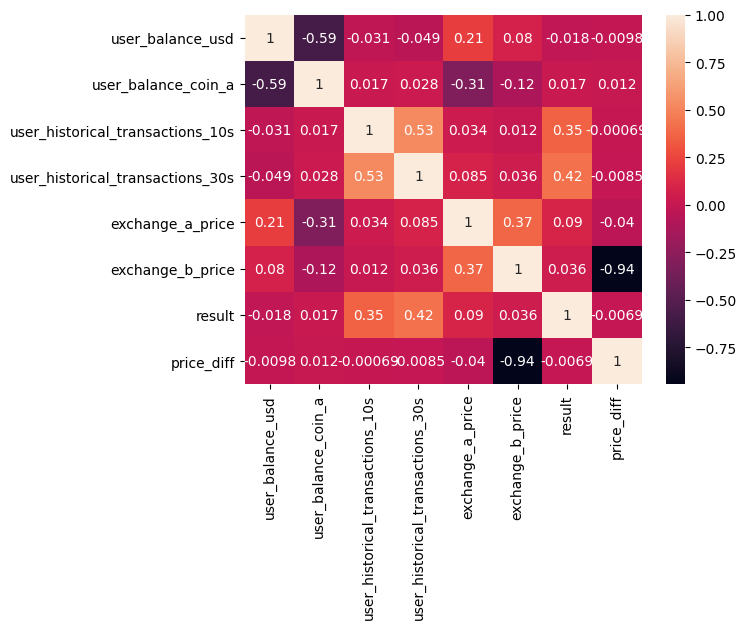

In [16]:
sns.heatmap(data_dropped.corr(), annot=True)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, roc_curve

In [18]:
from imblearn.over_sampling import RandomOverSampler


In [19]:
X, y = (data_dropped.drop("result", axis=1),
 data_dropped["result"])

In [20]:
scaler = StandardScaler()

X[list(X.columns)] = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:

ros_sampler = RandomOverSampler(sampling_strategy=.5, random_state=42)
X_over, y_over = ros_sampler.fit_resample(X_train, y_train)

In [23]:
X_over

,user_balance_usd,user_balance_coin_a,user_historical_transactions_10s,user_historical_transactions_30s,exchange_a_price,exchange_b_price,price_diff
0,-1.345590,2.676032,-0.111438,-0.226856,-1.035568,-0.500653,0.167723
1,-1.236282,0.087593,-0.111438,-0.226856,1.457593,0.324296,0.173077
2,1.962253,-1.028114,-0.111438,-0.226856,0.943196,0.156582,0.169292
3,2.240050,-1.055394,-0.111438,-0.226856,-0.552691,-0.362818,0.192361
4,-0.974260,1.929061,-0.111438,-0.226856,-0.514914,-0.326470,0.166791
...,...,...,...,...,...,...,...
270329,0.000952,-1.055513,-0.111438,-0.226856,0.975142,0.162306,0.174574
270330,-1.964581,2.248691,-0.111438,2.557649,-0.445817,-0.308668,0.172383
270331,-0.301025,0.439782,-0.111438,-0.226856,-1.419671,-0.633851,0.173464
270332,0.554120,-1.054137,-0.111438,-0.226856,-1.426302,-0.628928,0.165795


In [24]:
y_over.value_counts()/len(y_over)

0    0.666668
1    0.333332
Name: result, dtype: float64

In [25]:
X_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270334 entries, 0 to 270333
Data columns (total 7 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   user_balance_usd                  270334 non-null  float64
 1   user_balance_coin_a               270334 non-null  float64
 2   user_historical_transactions_10s  270334 non-null  float64
 3   user_historical_transactions_30s  270334 non-null  float64
 4   exchange_a_price                  270334 non-null  float64
 5   exchange_b_price                  270334 non-null  float64
 6   price_diff                        270334 non-null  float64
dtypes: float64(7)
memory usage: 14.4 MB


In [38]:
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, roc_curve, confusion_matrix

In [39]:
grid = {
    "C": [0.1, 1, 4, 8, 10],
    "penalty": ["l1", "l2", "elasticnet"], 
}

In [40]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=grid, scoring="roc_auc")


In [41]:
best_model = grid_search.fit(X_over, y_over).best_estimator_
best_preds = best_model.predict(X_test)


/home/jrr/.virtualenvs/HACK01/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jrr/.virtualenvs/HACK01/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jrr/.virtualenvs/HACK01/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/jrr/.virtualenvs/HACK01/lib/python3.8/site-packages/sklearn/linear_model/_logisti

In [47]:
pd.DataFrame(best_preds).value_counts()/len(best_preds)

0    0.939669
1    0.060331
dtype: float64

In [49]:
print(classification_report(y_test, best_preds))
print(confusion_matrix(y_test, best_preds))
print(roc_auc_score(y_test, best_preds))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     88760
           1       0.51      0.44      0.47      6630

    accuracy                           0.93     95390
   macro avg       0.73      0.70      0.72     95390
weighted avg       0.93      0.93      0.93     95390

[[85915  2845]
 [ 3720  2910]]
0.703430650347982


In [53]:
lr = LogisticRegression()
lr.fit(X_over, y_over)
pred = lr.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
print(roc_auc_score(y_test, pred))
# roc_curve(y_test, pred)
# X
# plot_confusion_matrix(lr, X_test, y_test) 

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     88760
           1       0.51      0.44      0.47      6630

    accuracy                           0.93     95390
   macro avg       0.73      0.70      0.72     95390
weighted avg       0.93      0.93      0.93     95390

[[85915  2845]
 [ 3720  2910]]
0.703430650347982


In [30]:
lr.coef_

array([[0.06286163, 0.19165388, 0.27216236, 0.74796291, 0.31872184,
        0.06470269, 0.04452403]])

In [51]:
lr.get_params(), best_model.get_params()

({'C': 1.0,
  'class_weight': None,
  'dual': False,
  'fit_intercept': True,
  'intercept_scaling': 1,
  'l1_ratio': None,
  'max_iter': 100,
  'multi_class': 'auto',
  'n_jobs': None,
  'penalty': 'l2',
  'random_state': None,
  'solver': 'lbfgs',
  'tol': 0.0001,
  'verbose': 0,
  'warm_start': False},
 {'C': 4,
  'class_weight': None,
  'dual': False,
  'fit_intercept': True,
  'intercept_scaling': 1,
  'l1_ratio': None,
  'max_iter': 100,
  'multi_class': 'auto',
  'n_jobs': None,
  'penalty': 'l2',
  'random_state': None,
  'solver': 'lbfgs',
  'tol': 0.0001,
  'verbose': 0,
  'warm_start': False})

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf = RandomForestClassifier()
rf.fit(X_over, y_over)
pred = rf.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
print(roc_auc_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     88760
           1       0.51      0.44      0.47      6630

    accuracy                           0.93     95390
   macro avg       0.73      0.70      0.72     95390
weighted avg       0.93      0.93      0.93     95390

[[85915  2845]
 [ 3720  2910]]
0.703430650347982


In [56]:
pred = rf.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
print(roc_auc_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     88760
           1       0.50      0.41      0.45      6630

    accuracy                           0.93     95390
   macro avg       0.73      0.69      0.71     95390
weighted avg       0.92      0.93      0.93     95390

[[85976  2784]
 [ 3886  2744]]
0.6912554199063755


In [ ]:
rf.